## 1. Mise en forme des données

#### Réseau de convolution
Un réseau de convolution doit être constitué de couche de convolution avec des couches de pooling, une couche flatten, des couches denses avec une activation Relu, on peut y ajouter des dropout et enfin un softmax pour finir.

Pour les entrées, il faut normaliser les images en les divisant par 255 pour avoir des valeurs compris entre 0 et 1. \
Pour l'utilisation de **sparse_categorical_crossentropy** il ne faut pas que les labels soient des vecteurs one-hot mais plutot des entiers.

*Pourquoi ces transformation* :\
Il n'y a donc pas besoin de transformer les labels en one-hot car la fonction **sparse_categorical_crossentropy** s'attend à recevoir des entiers. \
Et normaliser les images aide à avoir un meilleure apprentissage pour le modèle.

In [15]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

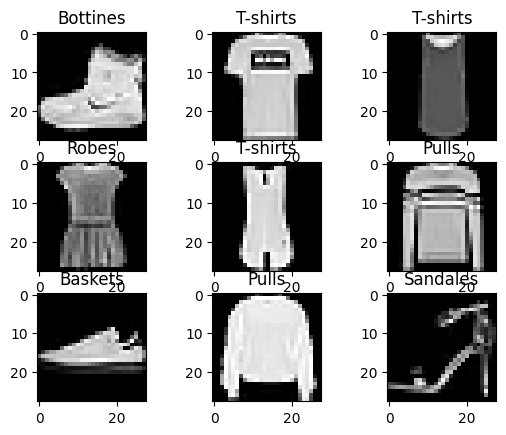

In [9]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

label_names = ['T-shirts', 'Pantalons', 'Pulls', 'Robes', 'Manteaux',
               'Sandales', 'Chemises', 'Baskets', 'Sacs', 'Bottines']

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(label_names[y_train[i]])
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

X_train /= 255
X_test /= 255

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


## 2. Création d’un premier modèle 

La couche de sortie dois être un softmax car nous avons une classification multiple à faire, avec un nombre de neurones égale au nombre de classe (10 pour nous, de 0 à 9)

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,298 (954.29 KB)

 Trainable params: 244,298 (954.29 KB)

 Non-trainable params: 0 (0.00 B)

Il y a un total de 244,298 paramètres à caler. Pour la première convolution : 5 * 5 * 16 + 16 = 416. On peut constater le nombre de paramètre détailler sur le "summary".

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 512
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5689 - loss: 1.2474 - val_accuracy: 0.7778 - val_loss: 0.5773
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7964 - loss: 0.5480 - val_accuracy: 0.8285 - val_loss: 0.4772
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8403 - loss: 0.4480 - val_accuracy: 0.8493 - val_loss: 0.4156
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8588 - loss: 0.3952 - val_accuracy: 0.8651 - val_loss: 0.3833
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8696 - loss: 0.3609 - val_accuracy: 0.8628 - val_loss: 0.3787
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8802 - loss: 0.3336 - val_accuracy: 0.8705 - val_loss: 0.3642
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8868 - loss: 0.3137 - val_accuracy: 0.8750 - val_loss: 0.3459
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8879 - loss: 0.3093 - val_accuracy: 0.8797 - v

<Axes: >

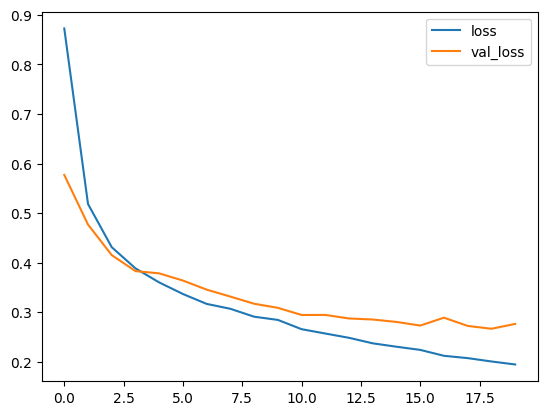

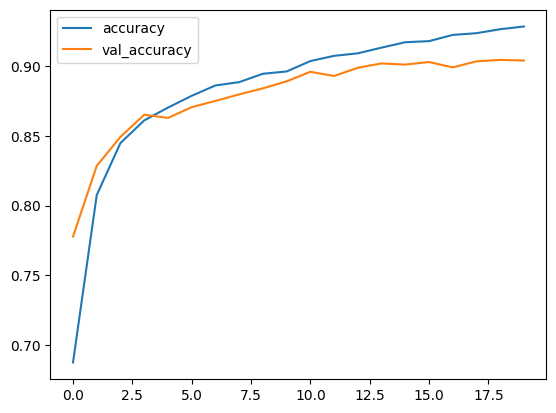

In [16]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

Le modèle n'est pas trop mal, nous avons une accuracy d'environ 90 ce qui est plutot bien, mais nous pouvons constater que les courbes ne sont pas très lisse.

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3598 - loss: 1.6864 - val_accuracy: 0.7426 - val_loss: 0.6769
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7175 - loss: 0.7342 - val_accuracy: 0.7898 - val_loss: 0.5373
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7629 - loss: 0.6227 - val_accuracy: 0.8069 - val_loss: 0.4878
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7832 - loss: 0.5672 - val_accuracy: 0.8309 - val_loss: 0.4591
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8074 - loss: 0.5204 - val_accuracy: 0.8455 - val_loss: 0.4183
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8184 - loss: 0.4911 - val_accuracy: 0.8561 - val_loss: 0.3939
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8284 - loss: 0.4700 - val_accuracy: 0.8634 - val_loss: 0.3765
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8352 - loss: 0.4479 - val_accuracy: 0.8674 - v

<Axes: >

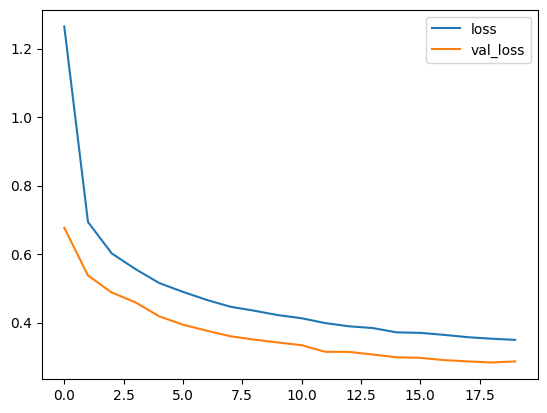

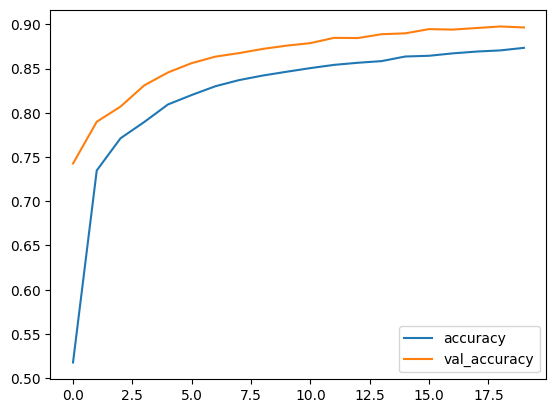

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

Les courbes sont plus lisse et mais le modèle est à peine moins performant, cela peux s'explique à cause des couches dropout après les couches de pooling.\

Il n'est pas juditieux dans notre cas de faire plus de 20 epochs, le modèle commencerais à faire du sur apprentissage.

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3177 - loss: 1.8067 - val_accuracy: 0.7383 - val_loss: 0.6799
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7066 - loss: 0.7826 - val_accuracy: 0.7900 - val_loss: 0.5440
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7531 - loss: 0.6537 - val_accuracy: 0.8056 - val_loss: 0.5128
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7826 - loss: 0.5880 - val_accuracy: 0.8278 - val_loss: 0.4624
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7955 - loss: 0.5463 - val_accuracy: 0.8400 - val_loss: 0.4319
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8086 - loss: 0.5216 - val_accuracy: 0.8492 - val_loss: 0.4112
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8169 - loss: 0.4995 - val_accuracy: 0.8584 - val_loss: 0.3925
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8288 - loss: 0.4714 - val_accuracy: 0.8571 - v

<Axes: >

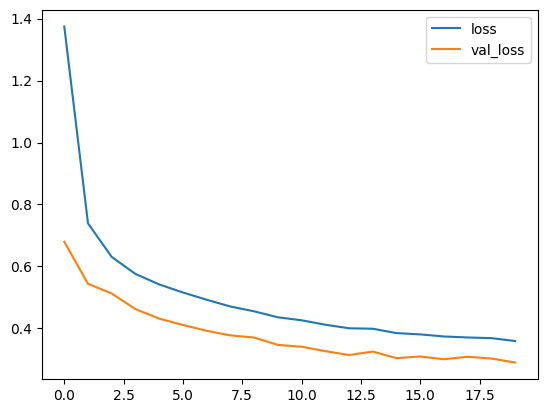

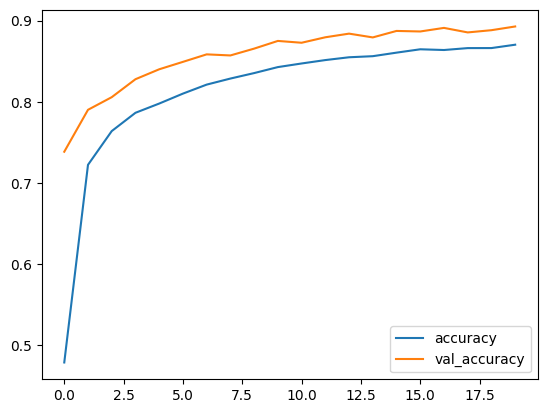

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

En ajoutant une couche de 128 notre modèle, il n'est pas vraiment améliorer. Je pense qu'il faudrait enlever la dernière couche car les résultats obtenus sont équivalent et je ne pense pas que le modèle puisse être plus améliorer que ce qu'on à maitenant.